## Create Data for easy CNN

Create a data set for an easy CNN from a dogs vs cats kaggle dataset.

In [1]:
# Import necessary libraries 
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
%matplotlib inline

In [2]:
# Change DATADIR for correct path to files
DATADIR = '/home/hignett/Documents/Flint/DogsVCats/PetImages'
CATEGORIES = ['Dog', 'Cat']
IMG_SIZE = 70

In [3]:
# Inspect data
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        break
    break
img_array.shape

(500, 452)

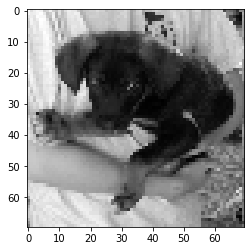

In [4]:
new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
plt.imshow(new_array, cmap='gray')

In [5]:
new_array.shape

(70, 70)

In [4]:
# Load and resize data

training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
                
create_training_data()

In [5]:
len(training_data)

24946

In [6]:
import random

random.shuffle(training_data)

In [7]:
X = []
y = []

In [10]:
# Split data into features and ground truth
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [11]:
# Save data so that you do not need to repeat this procces everytime
import pickle

dir_name = 'pickled_DogsVCats/'
os.makedirs(os.path.dirname(dir_name), exist_ok=True)

pickle_out = open(dir_name + 'X.pickle', 'wb')
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open(dir_name + 'y.pickle', 'wb')
pickle.dump(y, pickle_out)
pickle_out.close()

In [13]:
# Load data
dir_name = 'pickled_DogsVCats/'
try:
    X, y = pickle.load(open(dir_name + 'X.pickle', 'rb')), pickle.load(open(dir_name + 'y.pickle', 'rb'))
except Exception as e:
    print(e)